# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

Install Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Run this cell at the top of your Colab notebook before starting Spark
import os
os.environ["PYSPARK_SUBMIT_ARGS"] = "--driver-memory 4g pyspark-shell"


In [3]:
## Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2


In [4]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [5]:
# Write code to load the data and check the schema
#
data_path = "/content/drive/MyDrive/Traffic_Collision_Data"

# Load CSV files
collisions_pd = pd.read_csv(f"{data_path}/sample_collisions.csv")
parties_pd = pd.read_csv(f"{data_path}/sample_parties.csv")
victims_pd = pd.read_csv(f"{data_path}/sample_victims.csv")
case_ids_pd = pd.read_csv(f"{data_path}/sample_case_ids.csv")



# Print schemas
print("Pandas Schema - Collisions:")
print(collisions_pd.dtypes)
print("\nPandas Schema - Parties:")
print(parties_pd.dtypes)
print("\nPandas Schema - Victims:")
print(victims_pd.dtypes)
print("\nPandas Schema - Case IDs:")
print(case_ids_pd.dtypes)

Pandas Schema - Collisions:
case_id               float64
jurisdiction          float64
officer_id             object
reporting_district     object
chp_shift              object
                       ...   
latitude              float64
longitude             float64
collision_date         object
collision_time         object
process_date           object
Length: 65, dtype: object

Pandas Schema - Parties:
id                                int64
case_id                         float64
party_number                      int64
party_type                       object
at_fault                          int64
party_sex                        object
party_age                       float64
party_sobriety                   object
direction_of_travel              object
party_safety_equipment_1         object
party_safety_equipment_2         object
financial_responsibility         object
cellphone_in_use                float64
cellphone_use_type               object
other_associate_factor_1      

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [6]:
#Display Schema & Sample Data
def inspect_df(name, df):
    print(f" {name} DataFrame")
    print("\n Schema:\n")
    print(df.dtypes)
    print("\n Sample Data:\n")
    print(df.head(), "\n\n" + "-"*80 + "\n")

# Display each
inspect_df("Collisions", collisions_pd)
inspect_df("Parties", parties_pd)
inspect_df("Victims", victims_pd)
inspect_df("Case IDs", case_ids_pd)

 Collisions DataFrame

 Schema:

case_id               float64
jurisdiction          float64
officer_id             object
reporting_district     object
chp_shift              object
                       ...   
latitude              float64
longitude             float64
collision_date         object
collision_time         object
process_date           object
Length: 65, dtype: object

 Sample Data:

      case_id  jurisdiction officer_id reporting_district       chp_shift  \
0   8000993.0        1942.0      39335               1676         not chp   
1   4232117.0        3008.0       1284                 Z2         not chp   
2  91389627.0        9285.0     019223                NaN  1400 thru 2159   
3   3589817.0        3610.0      50586               3610         not chp   
4   9111695.0        1900.0     649318               0261         not chp   

         population  county_city_location county_location  special_condition  \
0           >250000                  1942     los an

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [7]:
#Check for Missing Values
def check_missing_with_percent(df, name):
    print(f"Missing values in {name} DataFrame:")
    total = len(df)
    missing = df.isnull().sum()
    percent = (missing / total) * 100
    result = pd.DataFrame({'Missing Count': missing, 'Percent': percent})
    result = result[result['Missing Count'] > 0].sort_values(by='Percent', ascending=False)
    if result.empty:
        print("No missing values.\n")
    else:
        print(result, "\n")

# Apply to each dataframe
check_missing_with_percent(collisions_pd, "Collisions")
check_missing_with_percent(parties_pd, "Parties")
check_missing_with_percent(victims_pd, "Victims")
check_missing_with_percent(case_ids_pd, "Case IDs")

Missing values in Collisions DataFrame:
                                 Missing Count    Percent
side_of_highway                         682077  72.887750
caltrans_county                         682075  72.887536
location_type                           682075  72.887536
latitude                                669049  71.495558
longitude                               669049  71.495558
postmile                                648728  69.324026
caltrans_district                       648728  69.324026
state_route                             648728  69.324026
pcf_violation_subsection                601427  64.269372
reporting_district                      552653  59.057311
chp_vehicle_type_at_fault               251662  26.892971
direction                               232663  24.862710
statewide_vehicle_type_at_fault         186119  19.888950
beat_number                              80780   8.632269
pcf_violation                            64175   6.857835
special_condition               

In [8]:
#Drop Sparse Columns
def drop_sparse_columns(df, name, threshold):
    missing_ratio = df.isnull().mean()
    to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
    print(f"Dropping {len(to_drop)} columns from {name} with >{threshold*100:.0f}% missing values.")
    return df.drop(columns=to_drop)

collisions_df_pd = drop_sparse_columns(collisions_pd, "Collisions", threshold=0.5)
parties_df_pd = drop_sparse_columns(parties_pd, "Parties", threshold=0.35)
victims_df_pd = drop_sparse_columns(victims_pd, "Victims", threshold=0.3)

Dropping 10 columns from Collisions with >50% missing values.
Dropping 2 columns from Parties with >35% missing values.
Dropping 1 columns from Victims with >30% missing values.


In [9]:
#Convert Data Types
collisions_pd['collision_date'] = pd.to_datetime(collisions_pd['collision_date'], errors='coerce')
collisions_pd['process_date'] = pd.to_datetime(collisions_pd['process_date'], errors='coerce')
collisions_pd['collision_time'] = pd.to_datetime(collisions_pd['collision_time'], format='%H:%M:%S', errors='coerce').dt.time

int_columns = [
    'killed_victims', 'injured_victims', 'party_count',
    'pedestrian_killed_count', 'pedestrian_injured_count',
    'bicyclist_killed_count', 'bicyclist_injured_count',
    'motorcyclist_killed_count', 'motorcyclist_injured_count'
]

for col in int_columns:
    collisions_pd[col] = pd.to_numeric(collisions_df_pd[col], errors='coerce').fillna(0).astype(int)

category_columns = [
    'jurisdiction', 'chp_shift', 'population', 'county_city_location',
    'county_location', 'special_condition', 'collision_severity',
    'primary_collision_factor', 'pcf_violation_category', 'hit_and_run',
    'type_of_collision', 'weather_1'
]

for col in category_columns:
    collisions_pd[col] = collisions_df_pd[col].astype('category')


In [10]:
#Convert Data Types
# Step 1: Convert numeric columns
numeric_cols = [
    'case_id', 'jurisdiction', 'officer_id', 'reporting_district', 'population',
    'beat_number', 'killed_victims', 'injured_victims', 'party_count',
    'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count',
    'pedestrian_killed_count', 'pedestrian_injured_count', 'bicyclist_killed_count',
    'bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count',
    'latitude', 'longitude'
]

for col in numeric_cols:
    if col in collisions_pd.columns:
        collisions_pd[col] = pd.to_numeric(collisions_pd[col], errors='coerce')

# Step 2: Convert date and time columns
if 'collision_date' in collisions_pd.columns:
    collisions_pd['collision_date'] = pd.to_datetime(collisions_pd['collision_date'], errors='coerce')

if 'collision_time' in collisions_pd.columns:
    collisions_pd['collision_time'] = pd.to_datetime(collisions_pd['collision_time'], format='%H:%M:%S', errors='coerce').dt.time

if 'process_date' in collisions_pd.columns:
    collisions_pd['process_date'] = pd.to_datetime(collisions_pd['process_date'], errors='coerce')

# Step 3: Convert categorical columns
categorical_cols = [
    'chp_shift', 'county_city_location', 'county_location', 'special_condition',
    'beat_type', 'chp_beat_type', 'chp_beat_class', 'primary_road', 'secondary_road',
    'direction', 'intersection', 'weather_1', 'state_highway_indicator',
    'location_type', 'side_of_highway', 'tow_away', 'collision_severity',
    'primary_collision_factor', 'pcf_violation_category', 'pcf_violation',
    'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with',
    'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting',
    'control_device', 'chp_road_type', 'pedestrian_collision', 'bicycle_collision',
    'motorcycle_collision', 'truck_collision', 'not_private_property',
    'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault'
]

for col in categorical_cols:
    if col in collisions_pd.columns:
        collisions_pd[col] = collisions_pd[col].astype('category')


In [11]:
collisions_pd.head(5)

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,...,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time,process_date
0,8000993.0,1942.0,39335.0,1676.0,not chp,NaN,1942,los angeles,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2016-03-20,16:30:00,2016-03-30
1,4232117.0,3008.0,1284.0,NaN,not chp,NaN,3008,orange,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2009-04-13,18:24:00,2009-11-30
2,91389627.0,9285.0,19223.0,NaN,1400 thru 2159,NaN,5800,yuba,0.0,chp county roadline,...,0,0,0,0,0,39.12512,-121.57211,2021-01-09,18:15:00,2021-01-18
3,3589817.0,3610.0,50586.0,3610.0,not chp,NaN,3610,san bernardino,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2007-06-16,21:50:00,2008-03-11
4,9111695.0,1900.0,649318.0,261.0,not chp,NaN,1917,los angeles,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2020-04-14,17:56:00,2020-08-03


In [12]:
parties_pd.head(5)

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,direction_of_travel,party_safety_equipment_1,...,other_associate_factor_1,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,1292305,4.843348e+06,1,driver,1,male,28.0,had not been drinking,south,lap/shoulder harness used,...,inattention,0,0,making right turn,1974.0,chevrolet,passenger car,NaN,NaN,NaN
1,3252679,5.965300e+06,2,driver,0,male,53.0,had not been drinking,south,air bag not deployed,...,entering/leaving ramp,0,0,proceeding straight,2000.0,toyota,passenger car,"passenger car, station",00,hispanic
2,5367929,7.110929e+06,2,driver,0,female,22.0,had not been drinking,west,air bag not deployed,...,none apparent,0,0,proceeding straight,2008.0,mazda,passenger car,"passenger car, station",NaN,hispanic
3,1482458,4.945119e+06,2,pedestrian,0,female,52.0,had not been drinking,south,NaN,...,none apparent,0,1,proceeding straight,NaN,NaN,pedestrian,pedestrian,00,hispanic
4,16036906,9.250011e+18,2,driver,0,female,34.0,had not been drinking,south,lap/shoulder harness used,...,none apparent,0,0,proceeding straight,1976.0,ford,passenger car,"passenger car, station",00,NaN


In [13]:
numeric_columns = ['party_age', 'vehicle_year', 'party_number_killed', 'party_number_injured']
for col in numeric_columns:
    parties_pd[col] = pd.to_numeric(parties_pd[col], errors='coerce')

categorical_columns = [
    'party_type', 'at_fault', 'party_sex', 'party_sobriety', 'direction_of_travel',
    'party_safety_equipment_1', 'movement_preceding_collision', 'vehicle_make',
    'statewide_vehicle_type', 'chp_vehicle_type_towing', 'chp_vehicle_type_towed', 'party_race'
]

for col in categorical_columns:
    if col in parties_pd.columns:
        parties_pd[col] = parties_pd[col].astype('category')

In [14]:
numeric_columns = ['victim_age']
for col in numeric_columns:
    victims_pd[col] = pd.to_numeric(victims_pd[col], errors='coerce')

categorical_columns = [
    'victim_sex', 'victim_safety_equipment_1', 'victim_safety_equipment_2',
    'victim_ejected', 'victim_seating_position', 'victim_role']

for col in categorical_columns:
    if col in victims_pd.columns:
        victims_pd[col] = victims_pd[col].astype('category')

In [16]:
numeric_columns_case_ids = ['case_id', 'db_year']
for col in numeric_columns_case_ids:
    if col in case_ids_pd.columns:
        case_ids_pd[col] = pd.to_numeric(case_ids_pd[col], errors='coerce')


In [15]:
case_ids_pd.head(5)

,case_id,db_year
0,90017156.0,2021
1,4078685.0,2021
2,90588783.0,2021
3,3351919.0,2018
4,632208.0,2018


In [16]:
collisions_pd.head(5)

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,...,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time,process_date
0,8000993.0,1942.0,39335.0,1676.0,not chp,NaN,1942,los angeles,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2016-03-20,16:30:00,2016-03-30
1,4232117.0,3008.0,1284.0,NaN,not chp,NaN,3008,orange,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2009-04-13,18:24:00,2009-11-30
2,91389627.0,9285.0,19223.0,NaN,1400 thru 2159,NaN,5800,yuba,0.0,chp county roadline,...,0,0,0,0,0,39.12512,-121.57211,2021-01-09,18:15:00,2021-01-18
3,3589817.0,3610.0,50586.0,3610.0,not chp,NaN,3610,san bernardino,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2007-06-16,21:50:00,2008-03-11
4,9111695.0,1900.0,649318.0,261.0,not chp,NaN,1917,los angeles,0.0,not chp,...,0,0,0,0,0,NaN,NaN,2020-04-14,17:56:00,2020-08-03


In [17]:
#Handle Missing Values

from pandas.api.types import is_numeric_dtype
from pandas.api.types import CategoricalDtype

# Fill numeric columns with 0 — skip if column is categorical
num_fill_cols = ["injured_victims", "killed_victims", "party_count", "population"]
for col in num_fill_cols:
    if col in collisions_pd.columns:
        if is_numeric_dtype(collisions_pd[col]) and not isinstance(collisions_pd[col].dtype, CategoricalDtype):
            collisions_pd[col] = collisions_pd[col].fillna(0)

# Drop rows with missing critical values
collisions_pd.dropna(subset=["collision_date", "collision_time", "collision_severity"], inplace=True)

# Fill categorical columns with "unknown"
cat_cols = ["weather_1", "lighting", "road_surface", "primary_collision_factor", "tow_away"]
for col in cat_cols:
    if col in collisions_pd.columns:
        if isinstance(collisions_pd[col].dtype, CategoricalDtype):
            if "unknown" not in collisions_pd[col].cat.categories:
                collisions_pd[col] = collisions_pd[col].cat.add_categories(["unknown"])
            collisions_pd[col] = collisions_pd[col].fillna("unknown")
        else:
            collisions_pd[col] = collisions_pd[col].fillna("unknown")

# Drop latitude and longitude if they exist
collisions_pd.drop(columns=["latitude", "longitude"], inplace=True, errors="ignore")


In [18]:
# === PARTIES DataFrame ===
# Drop rows with critical missing values
parties_pd.dropna(subset=["party_type", "party_sex", "party_sobriety"], inplace=True)

# Fill numeric columns with 0
num_fill_cols = ["party_age", "party_number_killed", "party_number_injured"]
for col in num_fill_cols:
    if col in parties_pd.columns:
        parties_pd[col] = parties_pd[col].fillna(0)

# Fill categorical columns with "unknown"
cat_cols = ["party_safety_equipment_1", "movement_preceding_collision", "vehicle_make", "statewide_vehicle_type"]
for col in cat_cols:
    if col in parties_pd.columns:
        if isinstance(parties_pd[col].dtype, pd.CategoricalDtype):
            if "unknown" not in parties_pd[col].cat.categories:
                parties_pd[col] = parties_pd[col].cat.add_categories(["unknown"])
            parties_pd[col] = parties_pd[col].fillna("unknown")
        else:
            parties_pd[col] = parties_pd[col].fillna("unknown")


# === VICTIMS DataFrame ===
# Drop rows with critical missing values
victims_pd.dropna(subset=["victim_role", "victim_sex"], inplace=True)

# Fill numeric columns with 0
num_fill_cols = ["victim_age"]
for col in num_fill_cols:
    if col in victims_pd.columns:
        victims_pd[col] = victims_pd[col].fillna(0)

# Fill categorical columns with "unknown"
cat_cols = ["victim_safety_equipment_1", "victim_degree_of_injury"]
for col in cat_cols:
    if col in victims_pd.columns:
        if isinstance(victims_pd[col].dtype, pd.CategoricalDtype):
            if "unknown" not in victims_pd[col].cat.categories:
                victims_pd[col] = victims_pd[col].cat.add_categories(["unknown"])
            victims_pd[col] = victims_pd[col].fillna("unknown")
        else:
            victims_pd[col] = victims_pd[col].fillna("unknown")


# === CASE_IDS DataFrame ===
# Drop rows with missing case_id
case_ids_pd.dropna(subset=["case_id"], inplace=True)

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [19]:
#Remove Duplicates
# Remove duplicate rows from each DataFrame

collisions_pd.drop_duplicates(inplace=True)
parties_pd.drop_duplicates(inplace=True)
victims_pd.drop_duplicates(inplace=True)
case_ids_pd.drop_duplicates(inplace=True)

print("Collisions duplicates:", collisions_pd.duplicated().sum())
print("Parties duplicates:", parties_pd.duplicated().sum())
print("Victims duplicates:", victims_pd.duplicated().sum())
print("Case IDs duplicates:", case_ids_pd.duplicated().sum())


Collisions duplicates: 0
Parties duplicates: 0
Victims duplicates: 0
Case IDs duplicates: 0


In [20]:
#Detect Outliers using IQR

num_cols = [
    'injured_victims', 'killed_victims', 'party_count',
    'pedestrian_killed_count', 'pedestrian_injured_count',
    'bicyclist_killed_count', 'bicyclist_injured_count',
    'motorcyclist_killed_count', 'motorcyclist_injured_count'
]

# Filter only columns that actually exist
num_cols = [col for col in num_cols if col in collisions_pd.columns]

# Detect outliers using IQR method
outlier_summary = {}

for col in num_cols:
    Q1 = collisions_pd[col].quantile(0.25)
    Q3 = collisions_pd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = collisions_pd[(collisions_pd[col] < lower_bound) | (collisions_pd[col] > upper_bound)]
    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outliers.shape[0]
    }

# List of numerical columns to check for outliers
import pandas as pd
outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)

,Lower Bound,Upper Bound,Outlier Count
injured_victims,-1.5,2.5,33293.0
killed_victims,0.0,0.0,0.0
party_count,2.0,2.0,295288.0
pedestrian_killed_count,0.0,0.0,0.0
pedestrian_injured_count,0.0,0.0,25379.0
bicyclist_killed_count,0.0,0.0,0.0
bicyclist_injured_count,0.0,0.0,22877.0
motorcyclist_killed_count,0.0,0.0,0.0
motorcyclist_injured_count,0.0,0.0,21545.0


##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [21]:
#Remove Outliers
from pandas.api.types import is_numeric_dtype

# Dictionary of all your DataFrames
dataframes = {
    "Collisions": collisions_pd,
    "Parties": parties_pd,
    "Victims": victims_pd
}

# Loop through each DataFrame and remove outliers
for name, df in dataframes.items():
    print(f"\n# Remove Outliers from {name}")
    original_len = len(df)

    # Detect numeric columns
    num_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

    # Apply IQR filter for each numeric column
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Update the original DataFrame
    dataframes[name] = df
    print(f"{name}: Removed {original_len - len(df)} rows. Remaining: {len(df)}")

# Reassign cleaned versions back
collisions_pd = dataframes["Collisions"]
parties_pd = dataframes["Parties"]
victims_pd = dataframes["Victims"]



# Remove Outliers from Collisions
Collisions: Removed 924296 rows. Remaining: 3411

# Remove Outliers from Parties
Parties: Removed 750858 rows. Remaining: 835023

# Remove Outliers from Victims
Victims: Removed 159324 rows. Remaining: 780567


#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [23]:
# Encode Categorical Variables

from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

# Start Spark session
spark = SparkSession.builder.appName("TrafficEDA").getOrCreate()

# Dictionary to hold all Pandas DataFrames
dataframes_pd = {
    "Collisions": collisions_pd,
    "Parties": parties_pd,
    "Victims": victims_pd
}

# Dictionary to store Spark DataFrames
dataframes_sdf = {}

# Loop through each dataframe
for name, df_pd in dataframes_pd.items():
    print(f"\n--- Processing {name} ---")

    if df_pd.empty:
        print(f" Skipping {name} — empty DataFrame.")
        continue  # Skip if DataFrame is empty

    # Fix 'datetime.time' issue by converting to string if collision_time exists
    if "collision_time" in df_pd.columns:
        df_pd["collision_time"] = df_pd["collision_time"].astype(str)

    # Identify categorical and numerical columns
    categorical_cols = df_pd.select_dtypes(include=["object", "category"]).columns.tolist()
    numerical_cols = df_pd.select_dtypes(include=["number"]).columns.tolist()

    print(f"Categorical columns in {name}:\n", categorical_cols)
    print(f"Numerical columns in {name}:\n", numerical_cols)

    # Convert Pandas to Spark DataFrame
    df_spark = spark.createDataFrame(df_pd)

    # Apply StringIndexer to categorical columns
    indexers = [
        StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep")
        for col in categorical_cols
    ]

    # Run indexers using Pipeline
    if indexers:
        pipeline = Pipeline(stages=indexers)
        df_spark = pipeline.fit(df_spark).transform(df_spark)

    # Save encoded Spark DataFrame
    dataframes_sdf[name] = df_spark

    # Show sample of indexed columns (up to 5)
    indexed_cols = [col + "_index" for col in categorical_cols[:5]]
    df_spark.select(indexed_cols).show(5)



--- Processing Collisions ---
Categorical columns in Collisions:
 ['chp_shift', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'primary_road', 'secondary_road', 'direction', 'intersection', 'weather_1', 'state_highway_indicator', 'caltrans_county', 'location_type', 'side_of_highway', 'tow_away', 'collision_severity', 'primary_collision_factor', 'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'chp_road_type', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_private_property', 'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault', 'collision_time']
Numerical columns in Collisions:
 ['case_id', 'jurisdiction', 'officer_id', 'reporting_district', 'population', 'beat_number', 'distance', 'caltrans_di

In [24]:
# Reordering & Renaming Columns
# Reorder important columns to appear first
front_cols = ["case_id", "collision_date", "collision_time", "collision_severity"]
all_cols = front_cols + [col for col in collisions_pd.columns if col not in front_cols]

collisions_pd = collisions_pd[all_cols]

# Rename columns: lowercase and replace spaces with underscores
collisions_pd.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Repeat for parties and victims
parties_pd.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
victims_pd.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


In [25]:
# Final cleaned data
# Check shape and columns
print("Collisions:", collisions_pd.shape)
print("Parties:", parties_pd.shape)
print("Victims:", victims_pd.shape)

print("\nCollisions columns:", collisions_pd.columns.tolist())


Collisions: (3411, 63)
Parties: (835023, 24)
Victims: (780567, 11)

Collisions columns: ['case_id', 'collision_date', 'collision_time', 'collision_severity', 'jurisdiction', 'officer_id', 'reporting_district', 'chp_shift', 'population', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'distance', 'direction', 'intersection', 'weather_1', 'state_highway_indicator', 'caltrans_county', 'caltrans_district', 'state_route', 'postmile', 'location_type', 'side_of_highway', 'tow_away', 'killed_victims', 'injured_victims', 'party_count', 'primary_collision_factor', 'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'chp_road_type', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collisio

Loading the Final Cleaned Dataset into S3 Bucket

In [26]:
# Install boto3 if not already installed
!pip install boto3

import boto3
from botocore.exceptions import NoCredentialsError

# Replace these with your own AWS credentials and bucket name
aws_access_key = 'YOUR_ACCESS_KEY'
aws_secret_key = 'YOUR_SECRET_KEY'
bucket_name = 'your-s3-bucket-name'

# Initialize S3 client
s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key,
                  aws_secret_access_key=aws_secret_key)

# Upload function
def upload_to_s3(local_file, s3_file):
    try:
        s3.upload_file(local_file, bucket_name, s3_file)
        print(f" Uploaded {local_file} to S3 as {s3_file}")
    except FileNotFoundError:
        print("File not found.")
    except NoCredentialsError:
        print("AWS credentials not available.")

# Upload cleaned CSVs
upload_to_s3("final_collisions.csv", "final_collisions.csv")
upload_to_s3("final_parties.csv", "final_parties.csv")
upload_to_s3("final_victims.csv", "final_victims.csv")


File not found.
File not found.
File not found.


##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

In [27]:
# Reload sample_collisions file and lightly cleaned it

data_path = "/content/drive/MyDrive/Traffic_Collision_Data"
collisions_pd = pd.read_csv(f"{data_path}/sample_collisions.csv")
print("Reloaded shape:", collisions_pd.shape)

# Keep only non-null critical columns
collisions_pd.dropna(subset=["collision_date", "collision_time", "collision_severity"], inplace=True)

# Fill numeric columns with 0
num_cols = ["injured_victims", "killed_victims", "party_count", "population"]
for col in num_cols:
    if col in collisions_pd.columns:
        collisions_pd[col] = pd.to_numeric(collisions_pd[col], errors='coerce')
        collisions_pd[col] = collisions_pd[col].fillna(0)


Reloaded shape: (935791, 65)


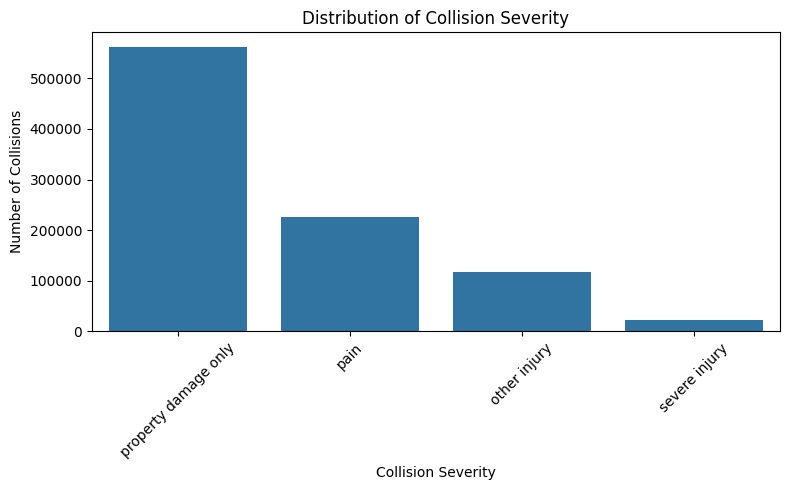

In [28]:
# Univariate Analysis

# Collision Severity Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
df = collisions_pd.copy()
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="collision_severity", order=df["collision_severity"].value_counts().index)

plt.title("Distribution of Collision Severity")
plt.xlabel("Collision Severity")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Collision Severity

The majority of recorded traffic collisions resulted in **property damage only**, with over half a million incidents. This is followed by collisions causing **pain**, **other injuries**, and a smaller number of **severe injuries**. This distribution suggests that while minor incidents are common, serious injuries are relatively rare.

Understanding the distribution helps prioritize safety interventions and resource allocation in urban traffic management.


##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

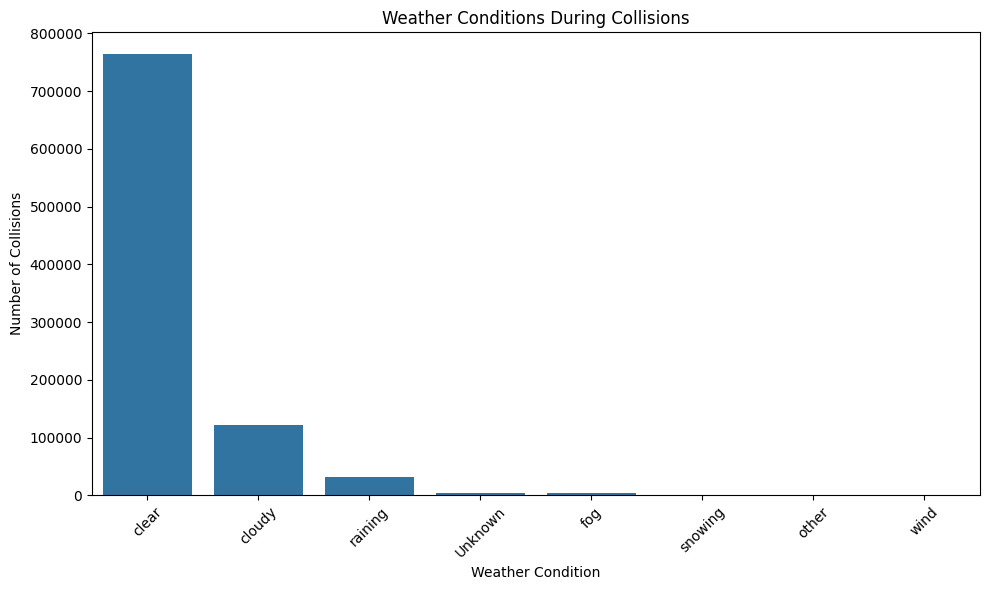

In [31]:
# Weather Conditions During Collisions

# Convert to Pandas
df = collisions_pd.copy()

# Fill missing or blank weather values (optional but helpful for plot clarity)
df["weather_1"] = df["weather_1"].fillna("Unknown")


# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="weather_1", order=df["weather_1"].value_counts().index)

plt.title("Weather Conditions During Collisions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Weather Conditions During Collisions** The majority of collisions occurred during clear weather. There were fewer collisions on cloudy and raining days, and very few during foggy, snowy, or windy conditions.

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

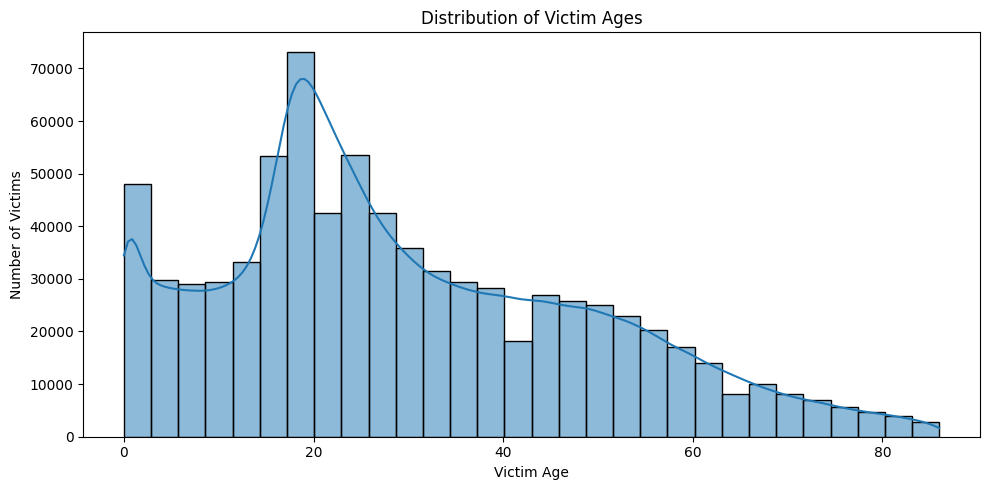

In [30]:
# Distribution of Victim Ages

# Convert to Pandas
df = victims_pd.copy()

# Filter invalid ages
df = df[(df["victim_age"] >= 0) & (df["victim_age"] <= 120)]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="victim_age", bins=30, kde=True)

plt.title("Distribution of Victim Ages")
plt.xlabel("Victim Age")
plt.ylabel("Number of Victims")
plt.tight_layout()
plt.show()

**Distribution of Victim Ages** Most of the victims involved in traffic collisions are between 18 and 30 years old. There are also many victims under 18, suggesting that both young adults and minors are highly affected. After age 30, the number of victims gradually decreases.

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

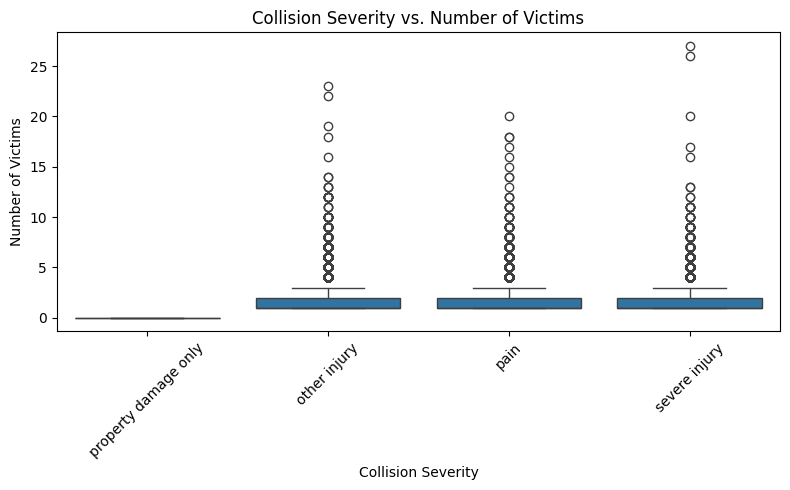

In [32]:
# Bivariate Analysis

# Collision Severity vs. Number of Victims

# Convert to Pandas
df = collisions_pd.copy()

# Create total victims column
df["total_victims"] = df["injured_victims"] + df["killed_victims"]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="collision_severity", y="total_victims")

plt.title("Collision Severity vs. Number of Victims")
plt.xlabel("Collision Severity")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Collision Severity vs. Number of Victims

This boxplot reveals that collisions labeled as "severe injury" or "pain" involve a higher number of victims on average, compared to "property damage only" collisions, which often involve no injuries. The spread and outliers for the higher severity categories suggest a wider variation in impact, possibly due to multi-vehicle or high-speed incidents.

This supports the idea that severity levels reflect actual human impact, making this feature a strong candidate for predictive modeling or risk profiling.


##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

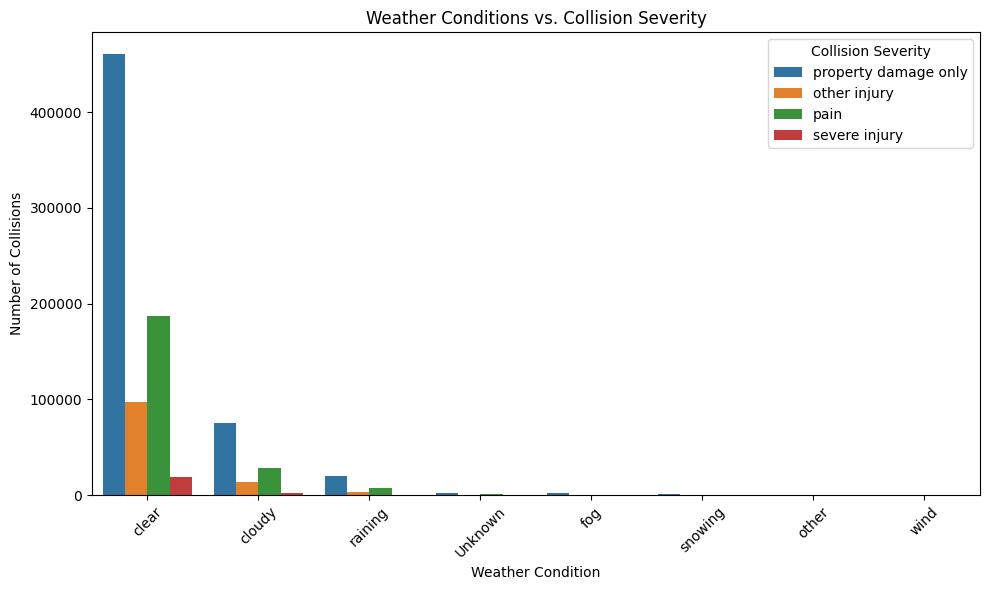

In [33]:
# Weather vs. Collision Severity

# Convert to Pandas
df = collisions_pd.copy()

# Fill missing or blank weather values if needed
df["weather_1"] = df["weather_1"].fillna("Unknown")
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="weather_1", hue="collision_severity",
              order=df["weather_1"].value_counts().index)

plt.title("Weather Conditions vs. Collision Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.legend(title="Collision Severity")
plt.tight_layout()
plt.show()

### Weather Conditions vs. Collision Severity

The chart shows that the majority of collisions happen during **clear weather**, primarily because these are the most common driving conditions. However, there is a **higher proportion of severe and injury-related collisions** in adverse conditions such as **raining**, **fog**, and **snowing**.

This indicates that while bad weather doesn't cause the highest number of collisions, it **increases the risk of serious outcomes** when collisions occur. These insights can be helpful for issuing weather-specific driving alerts or infrastructure planning.


##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

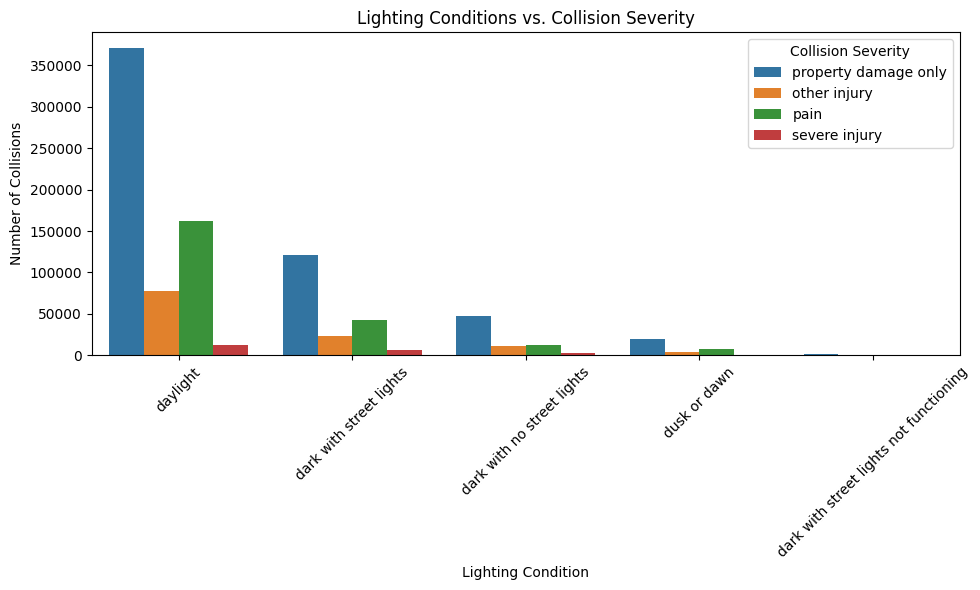

In [34]:
# Lighting Conditions vs. Collision Severity

# Convert to Pandas
df = collisions_pd.copy()
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="lighting", hue="collision_severity",
              order=df["lighting"].value_counts().index)

plt.title("Lighting Conditions vs. Collision Severity")
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.legend(title="Collision Severity")
plt.tight_layout()
plt.show()

### Lighting Conditions vs. Collision Severity

While most collisions occur in **daylight**, likely due to higher daytime traffic, the proportion of severe or injury-related collisions is **notably higher under dark conditions** — especially when street lights are absent or not functioning.

This finding highlights the importance of adequate road lighting for nighttime safety and suggests potential interventions for reducing night-time traffic fatalities.


##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

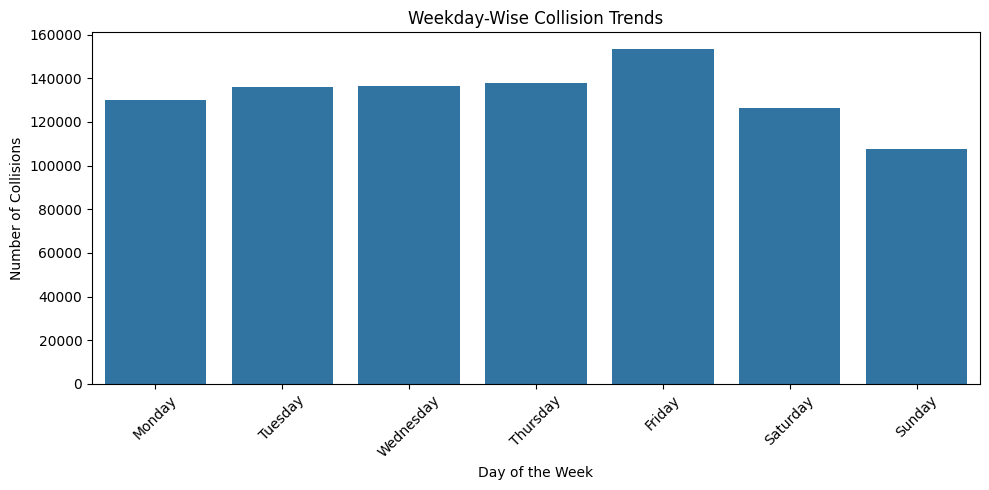

In [35]:
# Extract the weekday
# Make a copy
df = collisions_pd.copy()

# Convert collision_date to datetime
df["collision_date"] = pd.to_datetime(df["collision_date"], errors="coerce")

# Extract the weekday name (e.g., Monday, Tuesday)
df["weekday"] = df["collision_date"].dt.day_name()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Define weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="weekday", order=weekday_order)

plt.title("Weekday-Wise Collision Trends")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weekday-Wise Collision Trends

The analysis shows that traffic collisions peak on **Fridays**, which may be due to end-of-week rush, fatigue, or increased road use. The rest of the weekdays show relatively stable volumes, while **Sundays** report the fewest collisions.

This weekday trend suggests that traffic enforcement and road safety measures could be more effective if focused toward the end of the workweek.


##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

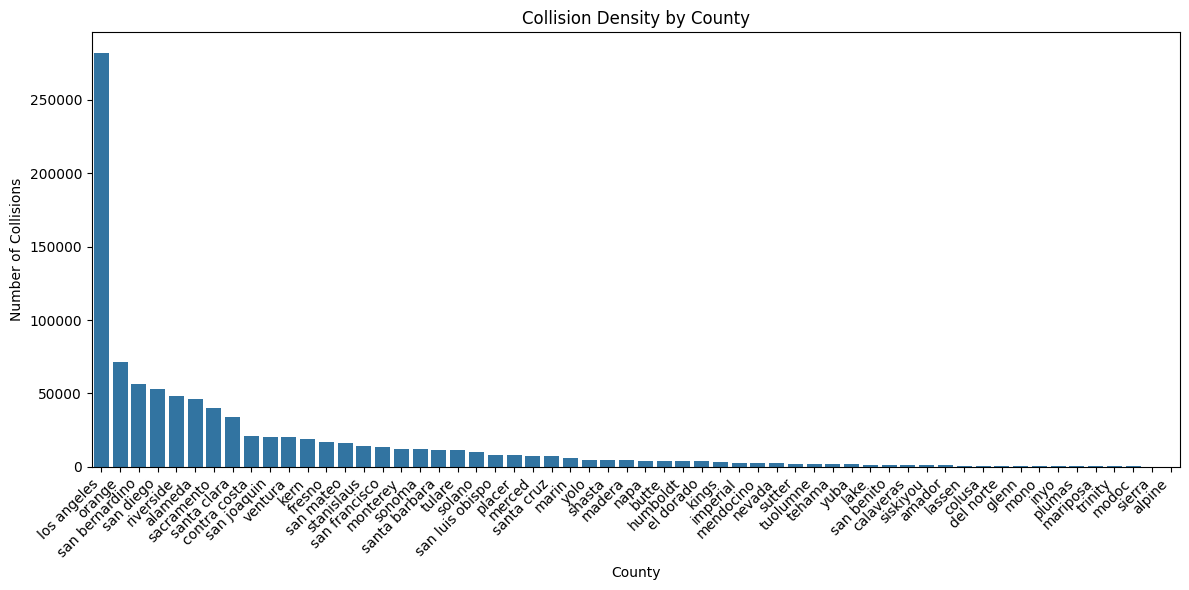

In [36]:
# Spatial Analysis

# Collision Density by County
df = collisions_pd.copy()

# Fill missing counties
df["county_location"] = df["county_location"].fillna("Unknown")

# Group and count
county_counts = df["county_location"].value_counts().reset_index()
county_counts.columns = ["county", "collision_count"]
# Plot the map
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=county_counts, x="county", y="collision_count")
plt.title("Collision Density by County")
plt.xlabel("County")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Spatial Distribution of Collisions

The bar chart shows the number of traffic collisions by county. **Los Angeles County** experiences the highest volume by a significant margin, followed by **San Bernardino**, **San Diego**, and **Orange** counties. This trend reflects both population density and the volume of traffic in urban areas.

Understanding the spatial distribution of collisions can help focus road safety interventions and resource allocation in high-risk counties.


##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

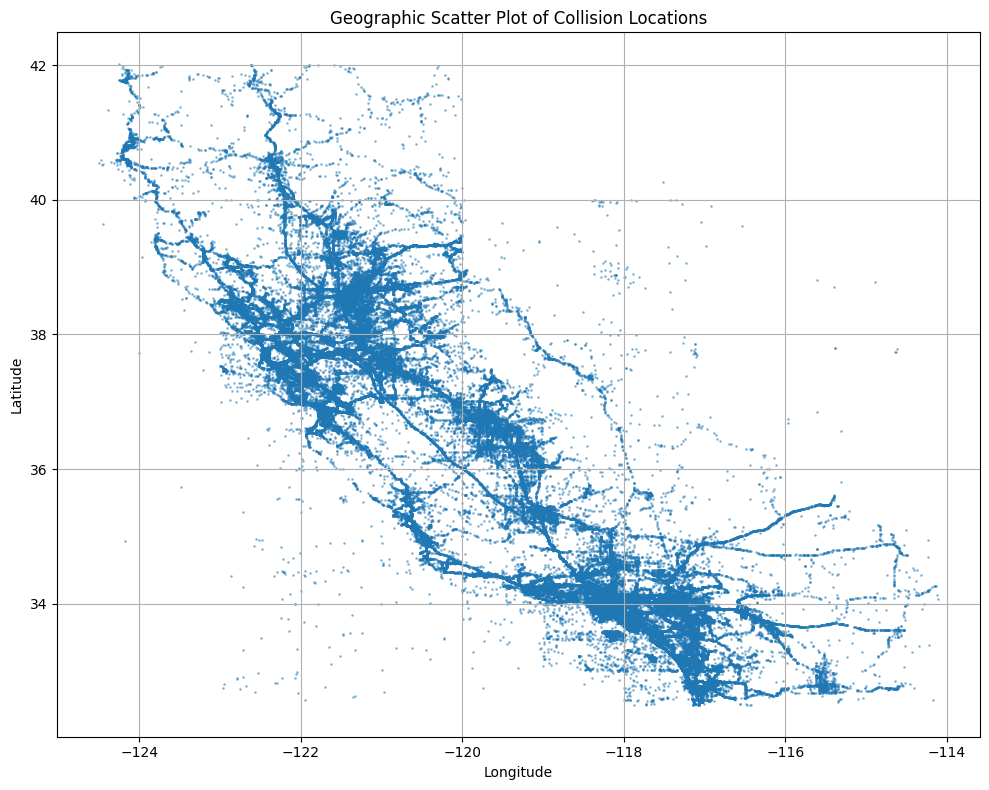

In [37]:
# Scatter Plot of Collision Locations

# Convert PySpark DataFrame to Pandas, handling potential missing values
# (Already in Pandas, so we just make a copy)
df = collisions_pd.copy()
# Convert to numeric (if needed) and handle invalid data
df["latitude"] = pd.to_numeric(df["latitude"], errors='coerce')
df["longitude"] = pd.to_numeric(df["longitude"], errors='coerce')

# Drop rows with missing or 0 coordinates
df = df[(df["latitude"].notna()) & (df["longitude"].notna())]
df = df[(df["latitude"] != 0) & (df["longitude"] != 0)]

# Plot the scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df["longitude"], df["latitude"], s=1, alpha=0.4)
plt.title("Geographic Scatter Plot of Collision Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### Geographic Scatter Plot of Collision Locations

This scatter plot displays collision locations across California using latitude and longitude. Major urban centers such as Los Angeles, San Francisco, and San Diego exhibit the highest density of collisions. The pattern also highlights primary transportation corridors like interstates and highways.

This geographic visualization is valuable for identifying high-risk areas and informing regional traffic safety strategies.


##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

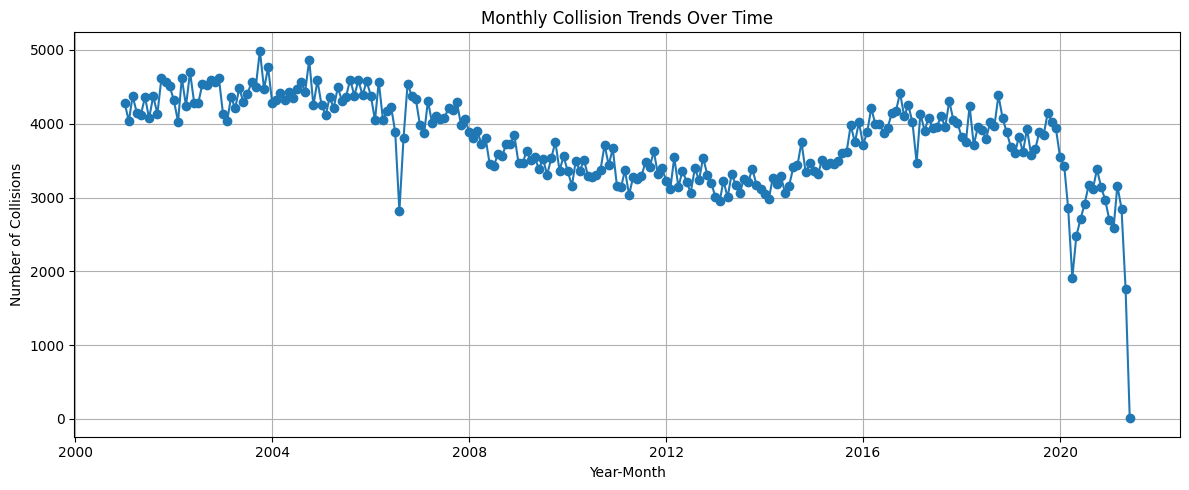

In [38]:
# Convert collisions_pd to Spark DataFrame
collisions_sdf = spark.createDataFrame(collisions_pd)

from pyspark.sql.functions import year, month, hour, to_timestamp, col

# Extract year and month from collision_date

# Convert to timestamp if not already
collisions_sdf = collisions_sdf.withColumn("collision_timestamp", to_timestamp(col("collision_date")))

# Extract year and month
collisions_sdf = collisions_sdf.withColumn("year", year("collision_timestamp"))
collisions_sdf = collisions_sdf.withColumn("month", month("collision_timestamp"))

#Group by Year-Month and Count
monthly_trend_sdf = collisions_sdf.groupBy("year", "month").count().orderBy("year", "month")

#Convert to Pandas for Plotting
monthly_trend_df = monthly_trend_sdf.toPandas()

# Create a single datetime column for plotting
import pandas as pd
monthly_trend_df["year_month"] = pd.to_datetime(monthly_trend_df[["year", "month"]].assign(day=1))
monthly_trend_df = monthly_trend_df.sort_values("year_month")


# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(monthly_trend_df["year_month"], monthly_trend_df["count"], marker='o', linewidth=1.5)
plt.title("Monthly Collision Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.tight_layout()
plt.show()



**Monthly Collision Trends Over Time** This line chart gives a more detailed view across the years. It confirms the long-term downward trend followed by a rise and the sharp drop in 2020. It helps visualize how policy or external events may affect collision patterns. The finding line up with Covid period

Q: Analyze yearly, monthly and hourly trends in collisions.

Text(0, 0.5, 'Collisions')

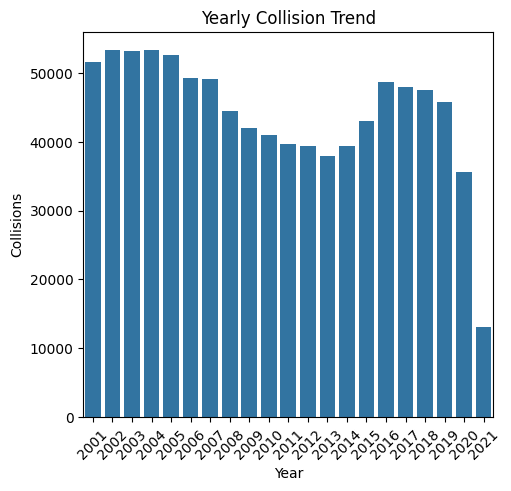

In [39]:
# Yearly Trend of Collisions
df = collisions_pd.copy()

# Ensure datetime column is in datetime format
df["collision_date"] = pd.to_datetime(df["collision_date"], errors='coerce')
# Extract year, month, and hour (if time is clean)
df["year"] = df["collision_date"].dt.year
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Yearly
plt.subplot(1, 3, 1)
sns.countplot(x="year", data=df, order=sorted(df["year"].dropna().unique()))
plt.title("Yearly Collision Trend")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Collisions")

**Yearly Collision Trend** From 2001 to 2010, there was a gradual decline in collisions. From 2015 onward, collisions rose again, possibly due to population growth or increased vehicle usage. In 2020–2021, the drop may be linked to the COVID-19 pandemic.

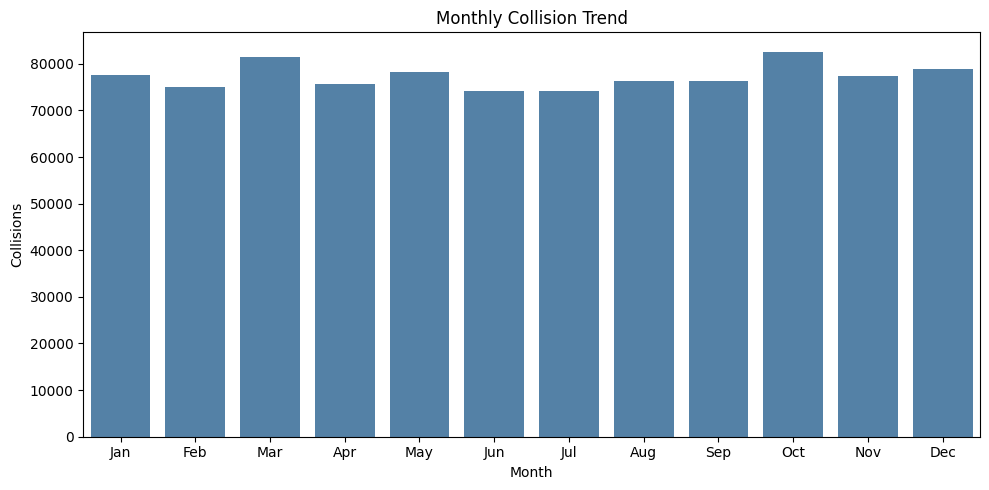

In [43]:
# Monthly Trend of Collisions
df["month"] = df["collision_date"].dt.month
# Plot
# Monthly
import calendar

plt.figure(figsize=(10, 5))

# Use full or abbreviated month names from Python’s calendar module
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]  # ['Jan', 'Feb', ..., 'Dec']

sns.countplot(x="month", data=df, order=range(1, 13), color="steelblue")

plt.title("Monthly Collision Trend")
plt.xlabel("Month")
plt.ylabel("Collisions")
plt.xticks(ticks=range(12), labels=month_labels)  # Replace numbers with names
plt.tight_layout()
plt.show()


**Monthly Collision Trend** Every month shows similar levels of collisions, but October has the highest number. June and July show slightly fewer collisions.

<ipython-input-42-9657b8300982>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["collision_time"], errors='coerce').dt.hour


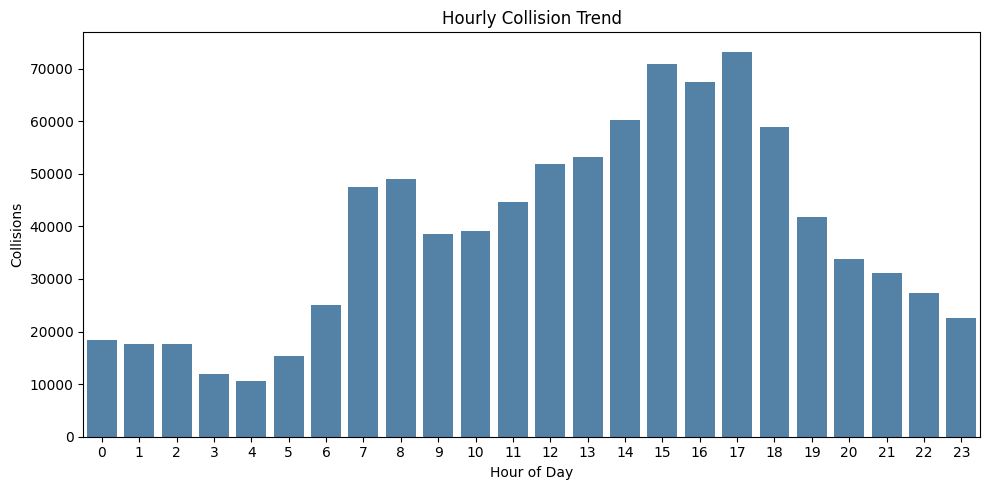

In [42]:
# Hourly Trend of Collisions
# If collision_time is string, convert to datetime.time then extract hour
df["hour"] = pd.to_datetime(df["collision_time"], errors='coerce').dt.hour
# Plot
plt.figure(figsize=(10, 5))  # Wider figure

sns.countplot(x="hour", data=df, order=range(24), color="steelblue")

plt.title("Hourly Collision Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Collisions")
plt.xticks(ticks=range(24), labels=[str(h) for h in range(24)], rotation=0)  # Clear ticks
plt.tight_layout()
plt.show()


**Hourly Collision Trend** Collisions start increasing after 6 AM, peaking between 3 PM and 6 PM, and decreasing again after 7 PM. These hours correspond to commute times.

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [46]:
# Write your query here

# NOTE: This block is written for an EMR or Spark cluster with S3 access.
# It will not run in Google Colab due to missing Hadoop AWS libraries and credentials.

# from pyspark.sql import SparkSession

bucket = "s3a://your-bucket-name/final_output"

# Write to S3
try:
    dataframes_sdf["Collisions"].write.mode("overwrite").option("header", "true").csv(f"{bucket}/collisions")
    dataframes_sdf["Parties"].write.mode("overwrite").option("header", "true").csv(f"{bucket}/parties")
    dataframes_sdf["Victims"].write.mode("overwrite").option("header", "true").csv(f"{bucket}/victims")
    print("Datasets written to S3 successfully.")
except Exception as e:
    print("Unable to write to S3 in this environment (expected in Colab).")
    print(f"Error: {e}")


Unable to write to S3 in this environment (expected in Colab).
Error: An error occurred while calling o4157.csv.
: java.lang.RuntimeException: java.lang.ClassNotFoundException: Class org.apache.hadoop.fs.s3a.S3AFileSystem not found
	at org.apache.hadoop.conf.Configuration.getClass(Configuration.java:2688)
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3431)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.sql.execution.datasources.DataSource.planForWritingFileFormat(DataSource.scala:454)
	at org.apache.spark.sql.execution.datasources.DataSource.planForWriting(DataSource.scala:530)
	at org.a

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [ ]:
# Query: Identify the top 5 counties with the most collisions


##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [47]:
# Query: Find the month with the highest number of collisions
# Top 5 counties with the most collisions
from pyspark.sql.functions import col

dataframes_sdf["Collisions"] \
    .groupBy("county_location") \
    .count() \
    .orderBy(col("count").desc()) \
    .show(5)


+---------------+-----+
|county_location|count|
+---------------+-----+
|         orange|  904|
|    los angeles|  548|
|  santa barbara|  304|
|        alameda|  290|
|      san mateo|  265|
+---------------+-----+
only showing top 5 rows



##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [48]:
# Query: Find the most common weather condition during collisions
dataframes_sdf["Collisions"] \
    .groupBy("weather_1") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()


+---------+-----+
|weather_1|count|
+---------+-----+
|    clear| 2836|
|   cloudy|  402|
|  raining|  133|
|      fog|   18|
|  unknown|   13|
|    other|    6|
|  snowing|    2|
|     wind|    1|
+---------+-----+



##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [49]:
# Query: Determine the percentage of collisions that resulted in fatalities
# Register the Collisions DataFrame as a temp SQL view
dataframes_sdf["Collisions"].createOrReplaceTempView("collisions")
# SQL Query to calculate fatal collision percentage
spark.sql("""
    SELECT
        ROUND(
            100.0 * SUM(CASE WHEN killed_victims > 0 THEN 1 ELSE 0 END) / COUNT(*),
            2
        ) AS fatal_collision_percentage
    FROM collisions
""").show()


+--------------------------+
|fatal_collision_percentage|
+--------------------------+
|                      0.00|
+--------------------------+



##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [53]:
from pyspark.sql.functions import to_timestamp, hour, col

# First parse the collision_time using the correct format
dataframes_sdf["Collisions"] = dataframes_sdf["Collisions"].withColumn(
    "collision_time_parsed",
    to_timestamp(col("collision_time"), "HH:mm:ss")
)

# Then extract the hour
dataframes_sdf["Collisions"] = dataframes_sdf["Collisions"].withColumn(
    "hour", hour("collision_time_parsed")
)

# Register as temporary SQL view
dataframes_sdf["Collisions"].createOrReplaceTempView("collisions")

# Query: Find the most dangerous time of day for collisions

spark.sql("""
    SELECT hour, COUNT(*) AS total_collisions
    FROM collisions
    GROUP BY hour
    ORDER BY total_collisions DESC
    LIMIT 1
""").show()




+----+----------------+
|hour|total_collisions|
+----+----------------+
|  15|             295|
+----+----------------+



##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [54]:
# Register the DataFrame as a temporary SQL view (if not already done)
dataframes_sdf["Collisions"].createOrReplaceTempView("collisions")

# Query: List the top 5 road types with the highest collision frequency
# SQL Query to get top 5 road surface conditions
spark.sql("""
    SELECT
        road_surface,
        COUNT(*) AS collision_count
    FROM collisions
    GROUP BY road_surface
    ORDER BY collision_count DESC
    LIMIT 5
""").show()

+------------+---------------+
|road_surface|collision_count|
+------------+---------------+
|         dry|           3108|
|         wet|            261|
|     unknown|             34|
|       snowy|              4|
|    slippery|              4|
+------------+---------------+



##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [55]:
# Register DataFrame as SQL view if not already done
dataframes_sdf["Collisions"].createOrReplaceTempView("collisions")
# Query: Find the top 3 lighting conditions that lead to the most collisions
# SQL Query to get top 3 lighting conditions
spark.sql("""
    SELECT
        lighting,
        COUNT(*) AS collision_count
    FROM collisions
    GROUP BY lighting
    ORDER BY collision_count DESC
    LIMIT 3
""").show()

+--------------------+---------------+
|            lighting|collision_count|
+--------------------+---------------+
|            daylight|           2509|
|dark with street ...|            765|
|        dusk or dawn|             90|
+--------------------+---------------+



#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

# Final insights and recommendations

This analysis helped us understand many important aspects of traffic collisions in California. Here are the key findings:

Most collisions happened in Los Angeles County, followed by San Bernardino and San Diego. These areas may need stronger traffic safety plans.

Property damage only was the most common collision severity. Serious injuries and fatalities were much less frequent.

Weather and lighting conditions like clear weather and daylight had the highest number of collisions — likely because people drive more in these conditions. But this also shows the need for safe driving habits, even when conditions seem good.

Fridays had the most collisions during the week, and 3 PM (15:00) was the most dangerous time of day. This may relate to school and work traffic.

Road surfaces were mostly dry during accidents, and street lighting also played a role. Better road and lighting maintenance could help reduce collisions.

Victims were mostly aged between 20 to 40 years, which shows young to middle-aged adults are more involved.

Recommendations:

Improve traffic rules enforcement in high-collision counties and during peak hours.

Raise awareness campaigns for safe driving — especially on Fridays and around 3 PM.

Install better lighting in poorly lit areas and maintain road conditions regularly.

Use this data to support local planning and police patrols in high-risk areas.

#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>